# Regression Tutorial - Level Beginner

## 데이터가져오기

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


## 기본정보:  

In [2]:
type(dataset)

pandas.core.frame.DataFrame

In [3]:
#check the shape of data
dataset.shape

(6000, 8)

In [4]:
#dataset.sample?

### sample

In [5]:
# frac : float, optional
#    Fraction of axis items to return
data = dataset.sample(frac=0.9, random_state=786)
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [6]:
print(data.shape)   
print(6000*0.9)

(5400, 8)
5400.0


In [7]:
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


## setup

In [9]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [10]:
type(exp_reg101)

tuple

In [11]:
best = compare_models(exclude= ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.1400
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.1180
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0100
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.0390
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0040
ridge,Ridge Regression,2413.5696,14120467.4606,3726.1613,0.8621,0.6689,0.2875,0.0020
lr,Linear Regression,2414.9293,14228311.8563,3742.6138,0.8608,0.6638,0.2872,0.1560
lasso,Lasso Regression,2412.1923,14246797.9959,3744.2305,0.8608,0.6767,0.2866,0.0050
llar,Lasso Least Angle Regression,2355.6151,14272022.7587,3745.3098,0.8607,0.6391,0.2728,0.0030
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0030


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [13]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582


In [14]:
# catboost = create_model('catboost')

In [15]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513


In [16]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199


In [17]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [18]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,649.2541,1131046.4835,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5518411.7880,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3024520.4058,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1774260.2775,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1974576.4174,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6725524.0654,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3324498.6208,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1872493.1136,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2274682.3424,1508.2050,0.9777,0.0766,0.0579


In [19]:
%config InlineBackend.figure_format = 'svg'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


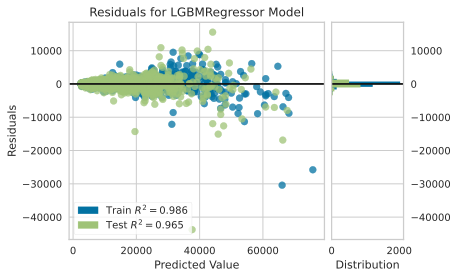

In [20]:
plot_model(tuned_lightgbm)

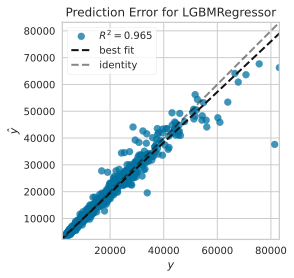

In [21]:
plot_model(tuned_lightgbm, plot = 'error')

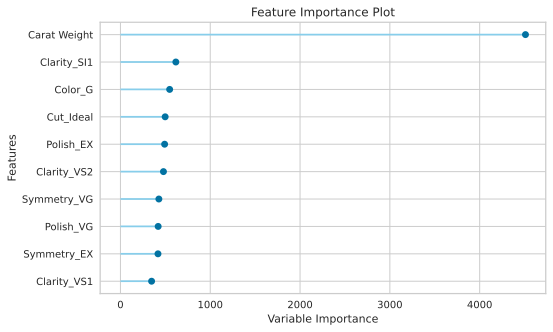

In [22]:
plot_model(tuned_lightgbm, plot='feature')

In [23]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3816757.2761,1953.6523,0.9652,0.0787,0.0558


In [25]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [26]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [27]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.9160,1199892.0334,1095.3958,0.9891,0.0498,0.0362


In [28]:
final_lightgbm.feature_name_

['Carat_Weight',
 'Cut_Fair',
 'Cut_Good',
 'Cut_Ideal',
 'Cut_Signature-Ideal',
 'Cut_Very_Good',
 'Color_D',
 'Color_E',
 'Color_F',
 'Color_G',
 'Color_H',
 'Color_I',
 'Clarity_FL',
 'Clarity_IF',
 'Clarity_SI1',
 'Clarity_VS1',
 'Clarity_VS2',
 'Clarity_VVS1',
 'Clarity_VVS2',
 'Polish_EX',
 'Polish_G',
 'Polish_ID',
 'Polish_VG',
 'Symmetry_EX',
 'Symmetry_G',
 'Symmetry_ID',
 'Symmetry_VG',
 'Report_GIA']

In [29]:
data_unseen.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238


In [30]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,707.9033,2268889.5439,1506.2834,0.9779,0.0696,0.0513


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

In [32]:
save_model(final_lightgbm,'Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [33]:
saved_final_lightgbm = load_model('Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


In [34]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,707.9033,2268889.5439,1506.2834,0.9779,0.0696,0.0513


In [35]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9779